In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#EWMA formula, acts as basis to compare other models
def ewma_predict_Days(volatility, lambda_, days, loss):
    predicted = []
    true = []
    start = len(volatility) - days
    for i in range(start, len(volatility)):
        historical = volatility.iloc[:i]
        ewma_value = historical.ewm(alpha=lambda_).mean().iloc[-1]
        true.append(volatility.iloc[i])
        predicted.append(ewma_value)
    if loss == "MSE":
        return np.mean((np.array(true)-np.array(predicted))**2)
    else:
        return None

In [38]:
#Load in AAPL data, make returns, variance, and volatility
df = pd.read_csv("data_files/AAPL_combined.csv.gz")
AAPL_returns = pd.DataFrame({
    "time_stamp": df["Unnamed: 0"],
    "log_return": np.log(1+(df['4. close']-df['1. open'])/df['1. open'])
})
AAPL_returns['time_stamp'] = pd.to_datetime(AAPL_returns['time_stamp'], errors='coerce')
daily_variance_AAPL = AAPL_returns.groupby(AAPL_returns['time_stamp'].dt.floor("1D"))["log_return"].var()


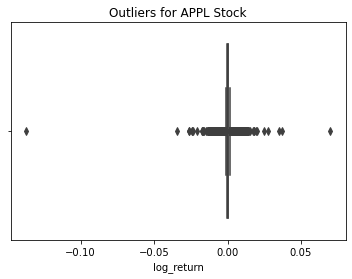

In [41]:
sns.boxplot(x="log_return", data=AAPL_returns)
plt.title("Outliers for APPL Stock")
plt.show()

In [39]:
lower_bound = AAPL_returns["log_return"].quantile(0.0125)
upper_bound = AAPL_returns["log_return"].quantile(0.9875)
AAPL_returns_filtered = AAPL_returns[(AAPL_returns["log_return"] >= lower_bound) & (AAPL_returns["log_return"] <= upper_bound)]
daily_variance_AAPL_filtered = AAPL_returns_filtered.groupby(AAPL_returns_filtered['time_stamp'].dt.floor("1D"))["log_return"].var()

Text(0.5, 1.0, 'Apple Returns Filtered')

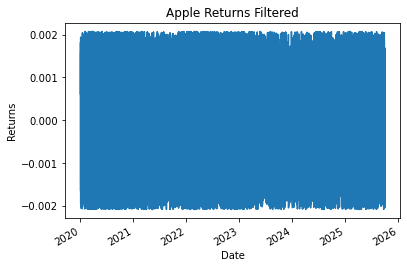

In [40]:
#Plot returns
AAPL_returns_filtered.set_index("time_stamp", inplace=True)
AAPL_returns_filtered.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Apple Returns Filtered")

Text(0.5, 1.0, 'Apple Variance Filtered')

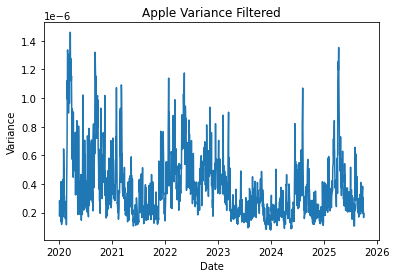

In [42]:
#Plot variance
plt.plot(daily_variance_AAPL_filtered.index, daily_variance_AAPL_filtered.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("Apple Variance Filtered")

Text(0.5, 1.0, 'Apple Volatility Filtered')

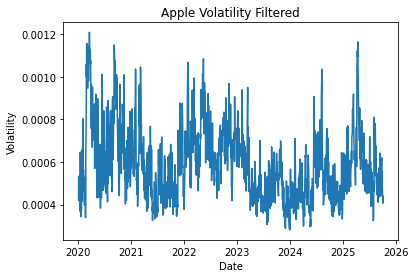

In [43]:
#Plot volatility
daily_volatility_AAPL_filtered = np.sqrt(daily_variance_AAPL_filtered)
plt.plot(daily_volatility_AAPL_filtered.index, daily_volatility_AAPL_filtered.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Apple Volatility Filtered")

In [44]:
#Use ewma and find the error in predicting the latest 20 days
mse_APPL = ewma_predict_Days(daily_volatility_AAPL_filtered, 0.94, 20, "MSE")
print("MSE: ", mse_APPL)

MSE:  7.77211795019013e-09


In [18]:
#Trying to do covariance correlation, issues with small numbers, become NA
APPL_daily_variance = pd.DataFrame({
    "timestamp": daily_variance.index,
    "variance": daily_variance.values

})
np.corrcoef(APPL_daily_variance.variance[0], APPL_daily_variance.variance[1])
APPL_daily_variance.variance[0]
# for i in range(len(APPL_daily_variance)-1):
#     print(APPL_daily_variance.variance[i])
timestamp = []
correlation = []
for i in range(len(APPL_daily_variance)-1):
    timestamp.append([APPL_daily_variance.timestamp[i], APPL_daily_variance.timestamp[i+1]])
    correlation.append(np.corrcoef(APPL_daily_variance.variance[i], APPL_daily_variance.variance[i+1])[0,1])
APPL_correlation = pd.DataFrame({
    "timestamps": timestamp,
    "correlation": correlation
})
APPL_correlation

NameError: name 'daily_variance' is not defined

In [48]:
df = pd.read_csv("data_files/BEP_combined.csv.gz")
df.columns
BEP_returns = pd.DataFrame({
    "time_stamp": df["Unnamed: 0"],
    "log_return": np.log(1+(df['4. close']-df['1. open'])/df['1. open'])
})
BEP_returns['time_stamp'] = pd.to_datetime(BEP_returns['time_stamp'], errors='coerce')
daily_variance_BEP = BEP_returns.groupby(BEP_returns['time_stamp'].dt.floor("1D"))["log_return"].var()

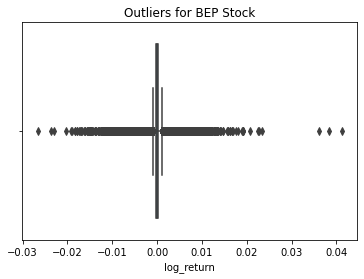

In [49]:
sns.boxplot(x="log_return", data=BEP_returns)
plt.title("Outliers for BEP Stock")
plt.show()

In [50]:
lower_bound = BEP_returns["log_return"].quantile(0.0125)
upper_bound = BEP_returns["log_return"].quantile(0.9875)
BEP_returns_filtered = BEP_returns[(BEP_returns["log_return"] >= lower_bound) & (BEP_returns["log_return"] <= upper_bound)]
daily_variance_BEP_filtered = BEP_returns_filtered.groupby(BEP_returns_filtered['time_stamp'].dt.floor("1D"))["log_return"].var()

Text(0.5, 1.0, 'BEP Returns Filtered')

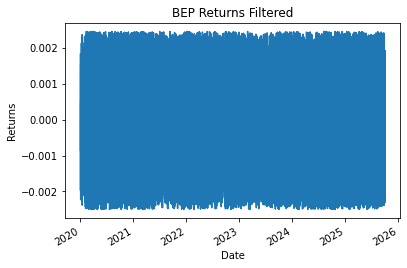

In [51]:
BEP_returns_filtered.set_index("time_stamp", inplace=True)
BEP_returns_filtered.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("BEP Returns Filtered")

Text(0.5, 1.0, 'BEP Variance Filtered')

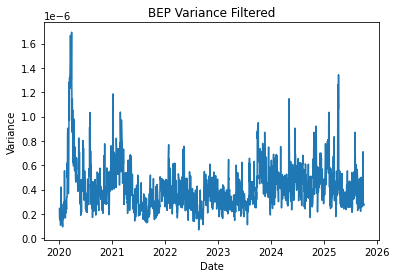

In [52]:
plt.plot(daily_variance_BEP_filtered.index, daily_variance_BEP_filtered.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("BEP Variance Filtered")

Text(0.5, 1.0, 'BEP Volatility filtered')

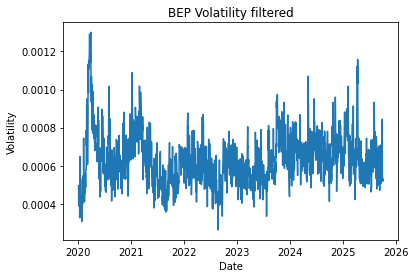

In [53]:
daily_volatility_BEP_filtered = np.sqrt(daily_variance_BEP_filtered)
plt.plot(daily_volatility_BEP_filtered.index, daily_volatility_BEP_filtered.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("BEP Volatility filtered")

In [54]:
mse_BEP = ewma_predict_Days(daily_volatility_BEP_filtered, 0.94, 20, "MSE")
print("BEP Filtered MSE: ", mse_BEP)

BEP Filtered MSE:  1.361859327667227e-08


In [60]:
df = pd.read_csv("data_files/LLY_combined.csv.gz")
df.columns
LLY_returns = pd.DataFrame({
    "time_stamp": df["Unnamed: 0"],
    "log_return": np.log(1+(df['4. close']-df['1. open'])/df['1. open'])
})
LLY_returns['time_stamp'] = pd.to_datetime(LLY_returns['time_stamp'], errors='coerce')
daily_variance_LLY = LLY_returns.groupby(LLY_returns['time_stamp'].dt.floor("1D"))["log_return"].var()




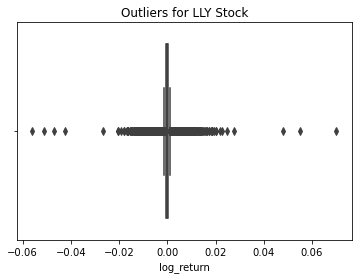

In [61]:
sns.boxplot(x="log_return", data=LLY_returns)
plt.title("Outliers for LLY Stock")
plt.show()

In [62]:
lower_bound = LLY_returns["log_return"].quantile(0.0125)
upper_bound = LLY_returns["log_return"].quantile(0.9875)
LLY_returns_filtered = LLY_returns[(LLY_returns["log_return"] >= lower_bound) & (LLY_returns["log_return"] <= upper_bound)]
daily_variance_LLY_filtered = LLY_returns_filtered.groupby(LLY_returns_filtered['time_stamp'].dt.floor("1D"))["log_return"].var()

Text(0.5, 1.0, 'LLY Returns Filtered')

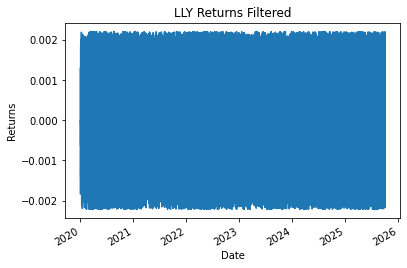

In [63]:
LLY_returns_filtered.set_index("time_stamp", inplace=True)
LLY_returns_filtered.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("LLY Returns Filtered")

Text(0.5, 1.0, 'LLY Variance Filtered')

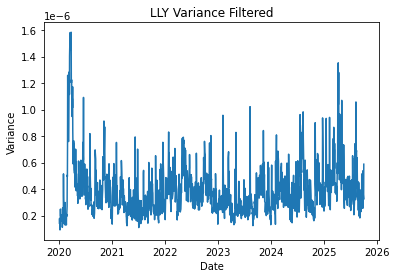

In [64]:
plt.plot(daily_variance_LLY_filtered.index, daily_variance_LLY_filtered.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("LLY Variance Filtered")

Text(0.5, 1.0, 'LLY Volatility Filtered')

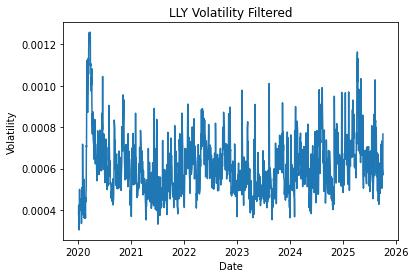

In [65]:
daily_volatility_LLY_filtered = np.sqrt(daily_variance_LLY_filtered)
plt.plot(daily_volatility_LLY_filtered.index, daily_volatility_LLY_filtered.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("LLY Volatility Filtered")

In [66]:
mse_LLY = ewma_predict_Days(daily_volatility_LLY_filtered, 0.94, 20, "MSE")
print("MSE Filtered LLY: ", mse_LLY)

MSE Filtered LLY:  8.297770244358856e-09
